In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/tech-data/oct-batch-2022/ml/kmeans/Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
col = list(df.columns)
col

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [24]:
col.pop(0)

'CustomerID'

In [25]:
col

['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [26]:
X = df[col]

In [30]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [32]:
map_gender = {"Male":0, "Female":1}
X['Genre'] = X['Genre'].replace(map_gender)

<ipython-input-32-418521d0fd7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genre'] = X['Genre'].replace(map_gender)


In [33]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [34]:
sc = StandardScaler() ##a-score =  (xi - Xbar)/ std --> StandardScaler
scaled_x = sc.fit_transform(X)

In [38]:
scaled_x[:10]

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002]])

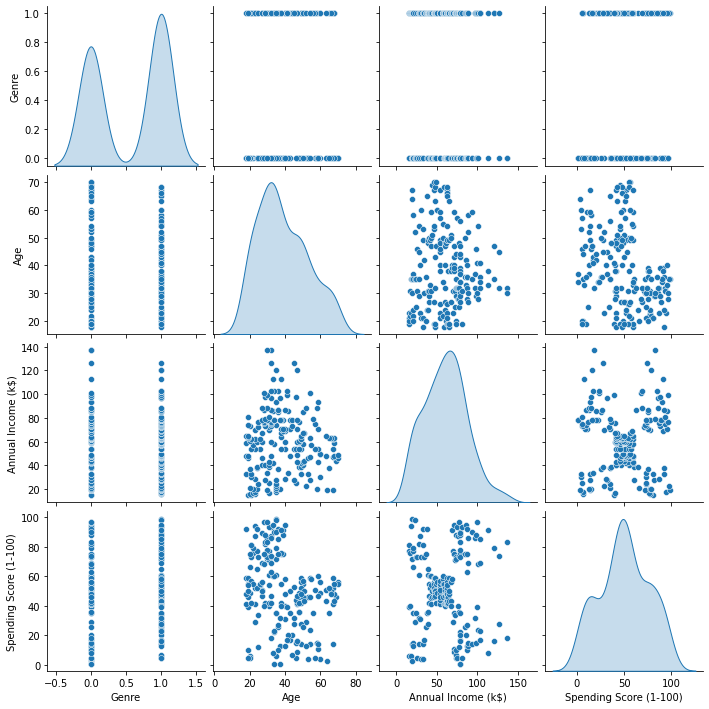

In [43]:
sns.pairplot(X, diag_kind='kde')

In [46]:
cluster = list(range(2,11))
inertia = []
sil_score = []

In [49]:
cluster

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [47]:
for i in cluster:
  cl = KMeans(n_clusters = i, max_iter = 100, random_state = 42)
  cl.fit(scaled_x)
  inertia.append(cl.inertia_)
  labels = cl.predict(scaled_x)
  sil_score.append(silhouette_score(scaled_x, labels))
  

In [53]:
output = pd.DataFrame({"cluster":cluster,"inertia":inertia, "sil_score":sil_score })
output

,cluster,inertia,sil_score
0,2,588.802677,0.251815
1,3,476.787554,0.259513
2,4,386.714786,0.301624
3,5,325.109983,0.317091
4,6,275.858843,0.333628
5,7,236.204947,0.357377
6,8,199.716626,0.387397
7,9,174.193096,0.402252
8,10,152.086763,0.420342


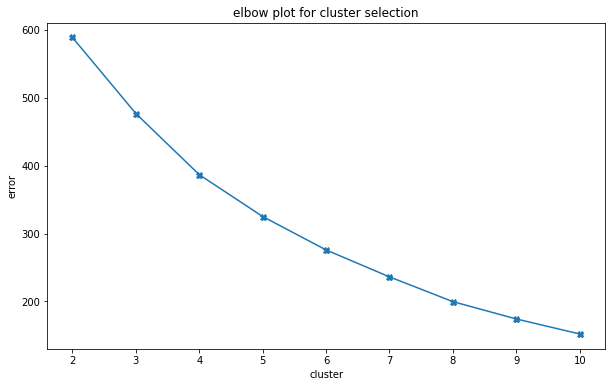

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(output["cluster"], output["inertia"], marker="X")
plt.xlabel("cluster")
plt.ylabel("error")
plt.title("elbow plot for cluster selection")
plt.show()

In [54]:
n_cluster = 6

In [59]:
model = KMeans(6, random_state = 3)

In [60]:
model.fit(scaled_x)

KMeans(n_clusters=6, random_state=3)

In [61]:
la = model.predict(scaled_x)

In [62]:
la

array([3, 3, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 3, 2, 3, 1, 2, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 2, 1, 2, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 1, 2,
       0, 2, 0, 2, 2, 2, 0, 3, 2, 1, 0, 1, 0, 1, 2, 1, 1, 3, 0, 0, 1, 3,
       0, 0, 3, 2, 1, 0, 0, 0, 1, 3, 0, 3, 2, 0, 1, 3, 1, 0, 2, 1, 0, 2,
       2, 0, 0, 3, 1, 0, 2, 3, 0, 2, 1, 3, 2, 0, 1, 3, 1, 2, 0, 1, 1, 1,
       1, 2, 0, 3, 2, 2, 0, 0, 0, 0, 3, 0, 0, 3, 2, 4, 5, 3, 1, 3, 5, 3,
       2, 4, 5, 4, 0, 3, 5, 4, 0, 3, 2, 4, 5, 3, 1, 4, 5, 3, 5, 3, 0, 4,
       0, 4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 3, 5, 3, 5, 3, 5, 4,
       5, 3, 5, 3, 5, 4, 5, 4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4], dtype=int32)

In [64]:
label = pd.DataFrame(la, columns =["label"])

In [66]:
final = pd.concat([X, label], axis =1 )

In [68]:
final.columns 

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'label'],
      dtype='object')

In [69]:
final.groupby('label')['Annual Income (k$)'].mean()

label
0    51.477273
1    48.678571
2    42.216216
3    56.307692
4    90.375000
5    91.321429
Name: Annual Income (k$), dtype: float64

In [72]:
final[final["label"]==0]

,Genre,Age,Annual Income (k$),Spending Score (1-100),label
6,1,35,18,6,0
12,1,58,20,15,0
22,1,46,25,5,0
24,1,54,28,14,0
26,1,45,28,32,0
28,1,40,29,31,0
34,1,49,33,14,0
36,1,42,34,17,0
38,1,36,37,26,0
40,1,65,38,35,0


In [79]:
scaled_x[la == 0]

array([[ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526,  0.51313183, -1.3573049 , -1.75473454],
       [ 0.88640526,  1.08726535, -1.24279661, -1.4053405 ],
       [ 0.88640526,  0.44136514, -1.24279661, -0.7065524 ],
       [ 0.88640526,  0.08253169, -1.20462718, -0.74537397],
       [ 0.88640526,  0.7284319 , -1.05194947, -1.4053405 ],
       [ 0.88640526,  0.22606507, -1.01378004, -1.28887582],
       [ 0.88640526, -0.20453507, -0.89927175, -0.93948177],
       [ 0.88640526,  1.87669894, -0.86110232, -0.59008772],
       [ 0.88640526,  0.7284319 , -0.82293289, -0.86183865],
       [ 0.88640526,  0.80019859, -0.78476346,  0.18634349],
       [ 0.88640526,  0.7284319 , -0.70842461,  0.06987881],
       [ 0.88640526,  0.80019859, -0.67025518, -0.20187212],
       [ 0.88640526,  0.87196528, -0.63208575, -0.00776431],
       [ 0.88640526,  2.02023231, -0.51757746,  0.06987881],
       [ 0.88640526,  1.

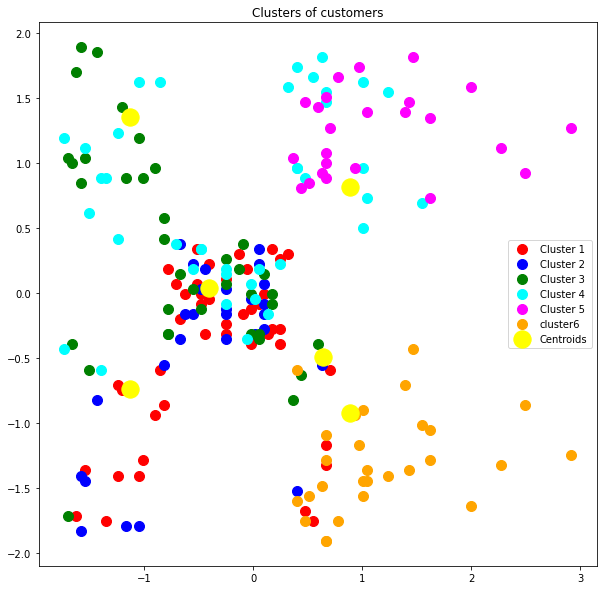

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(scaled_x[la == 0, 2], scaled_x[la == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_x[la == 1, 2], scaled_x[la == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_x[la == 2, 2], scaled_x[la == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaled_x[la == 3, 2], scaled_x[la == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(scaled_x[la == 4, 2], scaled_x[la == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(scaled_x[la==5,2], scaled_x[la==5,3], s=100, c="orange", label="cluster6")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()